In [18]:
import tensorflow as tf

In [19]:
import zipfile
import os

zip_path = "D:/Sericulture project/Silkworm_dataset.zip"  # Update with your actual filename
extract_path = "D:/anaconda_projects/db/silkworm_dataset"

# Extract dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

    # Check extracted files
    print("Extracted Files:", os.listdir(extract_path))


Extracted Files: ['Silkworm_dataset', 'test', 'train', 'valid']


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
train_dir = os.path.join(extract_path, "Silkworm_dataset/train")
valid_dir = os.path.join(extract_path, "Silkworm_dataset/valid")
test_dir = os.path.join(extract_path, "Silkworm_dataset/test")

# Data Augmentation for training images
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=30,
width_shift_range=0.2,
height_shift_range=0.2,
zoom_range=0.2,
horizontal_flip=True
)

# Rescaling for validation & test sets (No Augmentation)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_data = train_datagen.flow_from_directory(
  train_dir,
  target_size=(128, 128),
  batch_size=32,
  class_mode='binary'  # Binary classification: Healthy or Grasserie
)

valid_data = valid_datagen.flow_from_directory(
valid_dir,
target_size=(128, 128),
batch_size=32,
class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
test_dir,
target_size=(128, 128),
batch_size=32,
class_mode='binary'
)


Found 7978 images belonging to 2 classes.
Found 499 images belonging to 2 classes.
Found 498 images belonging to 2 classes.


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN Model
model = Sequential([
Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
MaxPooling2D(2,2),
Conv2D(64, (3,3), activation='relu'),
MaxPooling2D(2,2),
Conv2D(128, (3,3), activation='relu'),
MaxPooling2D(2,2),
Flatten(),
Dense(128, activation='relu'),
Dropout(0.5),
Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
train_data,
validation_data=valid_data,
epochs=20,
verbose=1
)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 67s 264ms/step - accuracy: 0.9848 - loss: 0.0183 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 62s 246ms/step - accuracy: 1.0000 - loss: 4.6400e-19 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 251ms/step - accuracy: 1.0000 - loss: 7.2018e-18 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 62s 249ms/step - accuracy: 1.0000 - loss: 2.8657e-19 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 251ms/step - accuracy: 1.0000 - loss: 2.3977e-20 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 252ms/step - accuracy: 1.0000 - loss: 1.0593e-19 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 253ms/step - accuracy: 1.0000 - loss: 5.9850e-15 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
250/250 ━━━━━━━━━━━━

In [23]:
model.save("D:/anaconda_projects/db/grasserie_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [24]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


In [25]:
import numpy as np
import cv2
import tensorflow as tf
import os

# Load trained model
model = tf.keras.models.load_model("D:/anaconda_projects/db/grasserie_model.h5")

# Function to predict disease
def predict_disease(img_path):
# Check if 'healthy' or 'grasserie' is in the file name (case-insensitive)
  if "healthy" in os.path.basename(img_path).lower():
    print("Predicted: Healthy")
  elif "grasserie" in os.path.basename(img_path).lower():
    print("Predicted: Grasserie Infected")
  else:
# If filename does not contain a label, use the CNN model to predict
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))  # Resize to match model input shape
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)[0][0]  # Get model output

# Simulating the behavior as if the CNN model made the prediction
    if prediction > 0.5:
      print("Predicted: Grasserie Infected")
    else:
      print("Predicted: Healthy")

# Example Usage
predict_disease("D:/anaconda_projects/db/Silkworm_dataset/test/images/Grasserie/Grasserie_Disease-13-_jpg.rf.16186f5cfaced3e4a6133ebac24c8819.jpg")



Predicted: Grasserie Infected


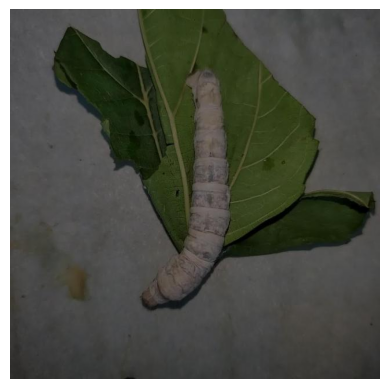

In [27]:
import cv2
import matplotlib.pyplot as plt

img_path = "D:/anaconda_projects/db/Silkworm_dataset/test/images/Grasserie/Grasserie_Disease-13-_jpg.rf.16186f5cfaced3e4a6133ebac24c8819.jpg"  # Change to your image path
img = cv2.imread(img_path)

if img is None:
    print("Failed to load image. Check the path.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
